In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('properties_outlier_treated.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,house,independent,sohna road road,6.25,6944.0,9001.0,Plot area 1000(836.13 sq.m.),3.0,3.0,0,1.0,NaN,Moderately Old,NaN,9000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3000.333333
1,flat,indiabulls centrum park,sector 103,1.15,8679.0,1325.0,Super Built up area 1325(123.1 sq.m.)Carpet ar...,2.0,2.0,3,10.0,North-East,Relatively New,1325.0,NaN,865.0,1.0,0.0,0.0,0.0,0.0,2.0,174.0,662.500000
2,flat,emaar gurgaon greens,sector 102,1.45,8788.0,1650.0,Super Built up area 1650(153.29 sq.m.)Built Up...,3.0,3.0,3,8.0,North-East,Relatively New,1650.0,1300.0,1100.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0,550.000000
3,flat,ss the leaf,sector 85,1.05,6162.0,1704.0,Super Built up area 1671(155.24 sq.m.),2.0,2.0,3+,7.0,West,Relatively New,1671.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,144.0,852.000000
4,house,vatika india next,sector 83,1.70,7870.0,2160.0,Plot area 240(200.67 sq.m.),3.0,3.0,3+,4.0,North-West,New Property,NaN,2160.0,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,720.000000


In [5]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1968
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

# Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

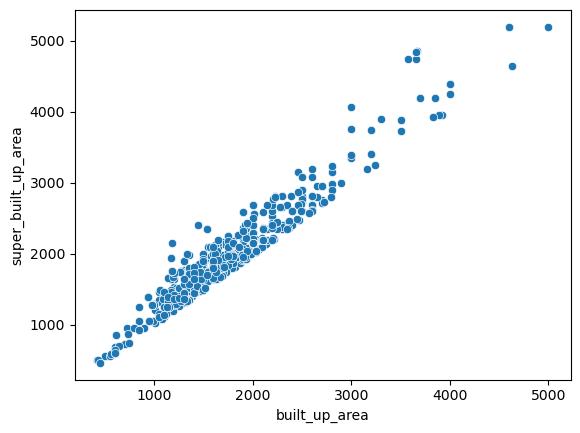

In [7]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

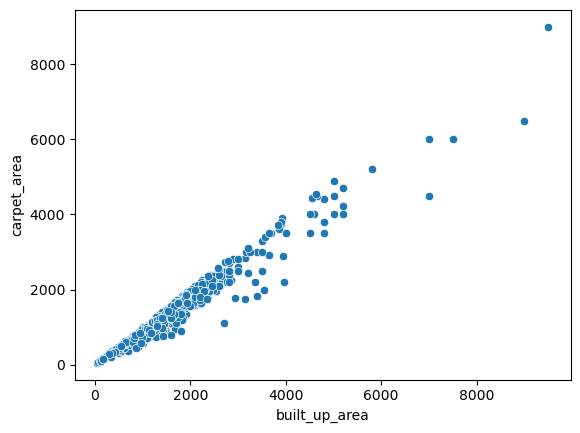

In [8]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [9]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3550    False
3551    False
3552    False
3553    False
3554    False
Length: 3555, dtype: bool

In [10]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [11]:
all_present_df.shape

(531, 24)

In [12]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [13]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [14]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [15]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [16]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,indiabulls centrum park,sector 103,1.15,8679.0,1325.0,Super Built up area 1325(123.1 sq.m.)Carpet ar...,2.0,2.0,3,10.0,North-East,Relatively New,1325.0,NaN,865.0,1.0,0.0,0.0,0.0,0.0,2.0,174.0,662.500000
19,flat,umang winter hills,sector 77,0.80,5961.0,1342.0,Super Built up area 1342(124.68 sq.m.)Carpet a...,2.0,2.0,2,10.0,North,Relatively New,1342.0,NaN,1000.0,0.0,0.0,0.0,0.0,0.0,2.0,49.0,671.000000
21,flat,godrej nature plus,sector 33,1.40,9333.0,1500.0,Super Built up area 1500(139.35 sq.m.)Carpet a...,2.0,2.0,3,14.0,NaN,Under Construction,1500.0,NaN,1385.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,750.000000
22,flat,bestech park view ananda,sector 81,1.40,7735.0,1810.0,Super Built up area 1810(168.15 sq.m.)Carpet a...,3.0,3.0,3+,6.0,North-West,Relatively New,1810.0,NaN,1180.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,603.333333
31,flat,emaar gurgaon greens,sector 102,1.30,7879.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3.0,3.0,3,7.0,North-East,Relatively New,1650.0,NaN,1155.0,0.0,1.0,0.0,0.0,0.0,0.0,93.0,550.000000


In [17]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\YASH SHARMA\AppData\Local\Temp\ipykernel_17548\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [18]:
df.update(sbc_df)

In [19]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1547
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [20]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [21]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
3,flat,ss the leaf,sector 85,1.05,6162.0,1704.0,Super Built up area 1671(155.24 sq.m.),2.0,2.0,3+,7.0,West,Relatively New,1671.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,144.0,852.000000
15,flat,radhakrishna society,sector 23,0.55,5000.0,1100.0,Super Built up area 1100(102.19 sq.m.),2.0,2.0,1,1.0,West,Moderately Old,1100.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2.0,29.0,550.000000
17,flat,smriti apartment,sector 56,0.45,7500.0,600.0,Super Built up area 600(55.74 sq.m.),1.0,1.0,2,3.0,NaN,Old Property,600.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,57.0,600.000000
20,flat,orchid petals,sector 49,2.23,10969.0,2033.0,Super Built up area 2033(188.87 sq.m.),3.0,3.0,3,14.0,North,Relatively New,2033.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,40.0,677.666667
34,flat,ansal heights,sector 92,0.60,4545.0,1320.0,Super Built up area 1320(122.63 sq.m.),2.0,2.0,3,11.0,NaN,Under Construction,1320.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,23.0,660.000000


In [22]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\YASH SHARMA\AppData\Local\Temp\ipykernel_17548\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [23]:
df.update(sb_df)

In [24]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area           672
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [25]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [26]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
5,flat,hector trimurti heights,sector 39,1.50,6383.0,2350.0,Carpet area: 2350 (218.32 sq.m.),4.0,3.0,3,10.0,South-East,Old Property,NaN,NaN,2350.0,0.0,1.0,0.0,0.0,0.0,1.0,49.0,587.5
8,flat,conscient habitat,sector 99a,0.27,5602.0,482.0,Carpet area: 484 (44.97 sq.m.),2.0,2.0,1,8.0,South-West,Relatively New,NaN,NaN,484.0,0.0,0.0,0.0,0.0,1.0,0.0,49.0,241.0
9,house,unitech escape,sector 50,12.00,37037.0,3240.0,Carpet area: 360 (301.01 sq.m.),5.0,6.0,3+,3.0,East,Undefined,NaN,NaN,360.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,648.0
18,flat,signature global solera,sector 107,0.28,5680.0,493.0,Carpet area: 489 (45.43 sq.m.),2.0,2.0,2,6.0,West,Relatively New,NaN,NaN,489.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,246.5
23,house,independent,sector 105,1.15,3285.0,3501.0,Carpet area: 3500 (325.16 sq.m.),3.0,2.0,1,1.0,NaN,Undefined,NaN,NaN,3500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1167.0


In [27]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\YASH SHARMA\AppData\Local\Temp\ipykernel_17548\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [28]:
df.update(c_df)

In [29]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

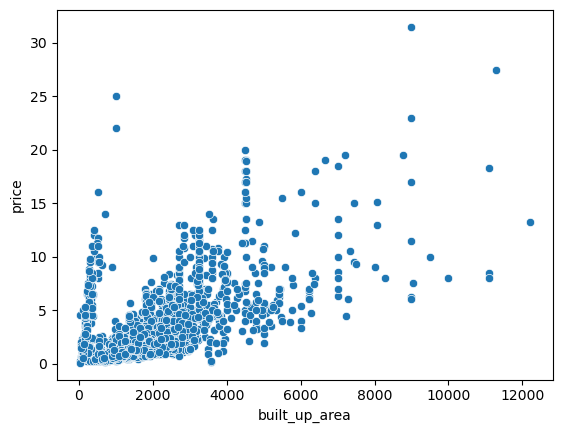

In [31]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [32]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [33]:
anamoly_df.sample(5)

,price,area,built_up_area
1426,3.60,1836.0,1836.0
12,2.80,1500.0,1500.0
2768,2.58,1458.0,1444.0
3008,4.50,3240.0,360.0
1916,4.50,1350.0,1350.0


In [34]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [35]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

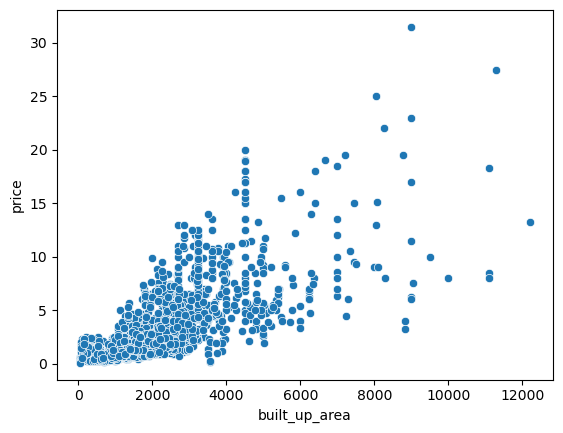

In [37]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [38]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [39]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sohna road road,6.25,6944.0,3.0,3.0,0,1.0,NaN,Moderately Old,9000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,flat,indiabulls centrum park,sector 103,1.15,8679.0,2.0,2.0,3,10.0,North-East,Relatively New,1080.0,1.0,0.0,0.0,0.0,0.0,2.0,174.0
2,flat,emaar gurgaon greens,sector 102,1.45,8788.0,3.0,3.0,3,8.0,North-East,Relatively New,1300.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0
3,flat,ss the leaf,sector 85,1.05,6162.0,2.0,2.0,3+,7.0,West,Relatively New,1512.0,0.0,0.0,1.0,0.0,0.0,0.0,144.0
4,house,vatika india next,sector 83,1.70,7870.0,3.0,3.0,3+,4.0,North-West,New Property,2160.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [40]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

# floorNum

In [41]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
344,house,independent,sector 3,1.50,10288.0,3.0,3.0,0,NaN,NaN,Old Property,210.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
393,house,emaar mgf marbella,sector 66,9.00,21251.0,4.0,4.0,3+,NaN,South-West,Relatively New,5200.0,0.0,1.0,1.0,1.0,0.0,2.0,114.0
557,house,independent,sector 4,4.12,8889.0,2.0,1.0,3+,NaN,NaN,Moderately Old,4635.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1390,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,2,NaN,East,Moderately Old,3240.0,0.0,1.0,1.0,1.0,0.0,0.0,88.0
1502,house,independent,sector 24,1.45,2984.0,3.0,3.0,1,NaN,NaN,Old Property,540.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
1697,flat,NaN,sector 78,0.60,3692.0,2.0,2.0,0,NaN,NaN,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2108,house,independent,sector 4,0.65,11111.0,4.0,2.0,2,NaN,NaN,Moderately Old,585.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2147,house,independent,sector 7,6.50,15046.0,3.0,2.0,3+,NaN,NaN,Old Property,4320.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
2158,house,ansal sushant lok,sector 43,10.50,27911.0,4.0,4.0,2,NaN,North-East,Old Property,3762.0,0.0,1.0,0.0,0.0,0.0,0.0,59.0
2422,house,independent,sector 25,13.00,45710.0,6.0,8.0,3+,NaN,NaN,Relatively New,2844.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0


In [42]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [43]:
df['floorNum'].fillna(2.0,inplace=True)

In [44]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

# facing

<Axes: ylabel='facing'>

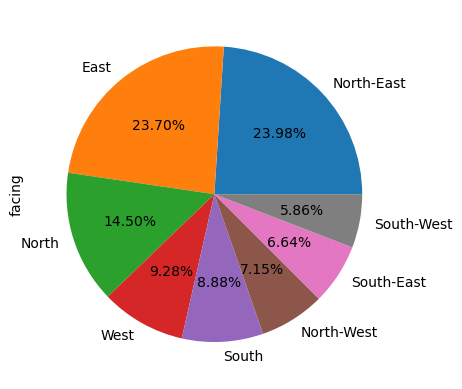

In [45]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [46]:
df.drop(columns=['facing'],inplace=True)

In [47]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1345,flat,smart world orchard,sector 61,1.60,13913.0,2.0,2.0,2,4.0,New Property,1278.00,1.0,0.0,0.0,0.0,1.0,0.0,29.0
1907,flat,raheja revanta,sector 78,0.99,6100.0,2.0,2.0,3,14.0,Under Construction,1467.00,0.0,0.0,0.0,0.0,1.0,0.0,39.0
2090,house,independent,sector 13,4.50,9091.0,4.0,5.0,2,2.0,Old Property,4950.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,flat,orchid petals,sector 49,1.95,9974.0,3.0,3.0,3,2.0,Old Property,1633.00,0.0,0.0,0.0,0.0,0.0,2.0,90.0
1001,flat,experion windchants,sector 112,3.75,13383.0,3.0,3.0,2,21.0,Relatively New,2225.56,0.0,1.0,0.0,0.0,0.0,2.0,159.0


In [48]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [49]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1697,flat,NaN,sector 78,0.6,3692.0,2.0,2.0,0,2.0,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
df.drop(index=[1697],inplace=True)

# age Possession

In [51]:
df['agePossession'].value_counts()

Relatively New        1605
New Property           557
Moderately Old         545
Undefined              431
Old Property           293
Under Construction     123
Name: agePossession, dtype: int64

In [52]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
6,house,surendra homes dayaindependentd colony,sector 6,0.75,15625.0,4.0,4.0,2,1.0,Undefined,480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,house,unitech escape,sector 50,12.00,37037.0,5.0,6.0,3+,3.0,Undefined,3240.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0
12,house,independent,sector 55,2.80,18667.0,4.0,4.0,0,2.0,Undefined,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,house,independent,sector 3,0.90,8929.0,3.0,1.0,0,1.0,Undefined,1008.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,house,independent,sector 105,1.15,3285.0,3.0,2.0,1,1.0,Undefined,3889.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,flat,smart world gems,sector 89,1.16,8152.0,3.0,3.0,2,3.0,Undefined,1581.0,1.0,0.0,0.0,0.0,0.0,0.0,68.0
3516,house,independent,sector 3,0.92,15257.0,4.0,1.0,0,1.0,Undefined,603.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3517,house,independent,sector 105,1.30,11556.0,3.0,3.0,1,1.0,Undefined,1125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3545,flat,m3m heights,sector 65,2.50,13602.0,3.0,3.0,3,19.0,Undefined,1654.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0


In [53]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [54]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [55]:
df['agePossession'].value_counts()

Relatively New        1782
New Property           635
Moderately Old         586
Old Property           331
Under Construction     125
Undefined               95
Name: agePossession, dtype: int64

In [56]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [57]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [58]:
df['agePossession'].value_counts()

Relatively New        1798
New Property           657
Moderately Old         593
Old Property           342
Under Construction     125
Undefined               39
Name: agePossession, dtype: int64

In [59]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [60]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [61]:
df['agePossession'].value_counts()

Relatively New        1814
New Property           657
Moderately Old         616
Old Property           342
Under Construction     125
Name: agePossession, dtype: int64

In [62]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [63]:
df.to_csv('properties_missing_value_imputation.csv',index=False)

In [64]:
df.shape

(3554, 18)